# Wrangling and Analyzing WeRateDogs Data

Wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

### Introduction into the dataset

1. The WeRateDogs Twitter archive. One column of the archive does contain: each tweet's text, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo). Of the 5000+ tweets, tweets are filtered with ratings only (there are 2356).

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network (to be downloaded programmatically using the Requests library).

3. Each tweet's retweet count and favorite ("like") count (to be gathered programmatically via Twitter API).

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns

# Step 1. Data collection

1. The WeRateDogs Twitter archive (file as given)

In [2]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2230,668237644992782336,NaN,NaN,2015-11-22 01:20:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Torque. He served his nickel. Better n...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668237644...,10,10,Torque,None,None,None,None
2055,671362598324076544,NaN,NaN,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671362598...,11,10,Tanner,None,None,None,None
164,860184849394610176,NaN,NaN,2017-05-04 17:30:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860184849...,14,10,None,None,None,None,None
445,819227688460238848,NaN,NaN,2017-01-11 17:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,None,None,None,None
1699,680970795137544192,NaN,NaN,2015-12-27 04:37:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I thought I made this very clear. We only rate...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680970795...,9,10,None,None,None,None,None


2. The tweet image predictions (file downloaded programmatically)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
        file.write(response.content)

predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')
predictions_df.to_csv('predictions_df.csv', index=False)
predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1403,769212283578875904,https://pbs.twimg.com/media/CqzKfQgXEAAWIY-.jpg,1,golden_retriever,0.166538,True,Pekinese,0.148215,True,cocker_spaniel,0.082735,True
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,Irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
1734,821522889702862852,https://pbs.twimg.com/media/C2aitIUXAAAG-Wi.jpg,1,Doberman,0.763539,True,black-and-tan_coonhound,0.136602,True,miniature_pinscher,0.087654,True
2000,876120275196170240,https://pbs.twimg.com/media/DCiavj_UwAAcXep.jpg,1,Bernese_mountain_dog,0.534327,True,Saint_Bernard,0.346312,True,Greater_Swiss_Mountain_dog,0.094933,True
1798,831650051525054464,https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg,1,Eskimo_dog,0.530416,True,Siberian_husky,0.180335,True,Norwegian_elkhound,0.104314,True


3. Each tweet's retweet count and favorite ("like") count (file constructed via API)

In [4]:
#####

# Hidden code containing API.

#####

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Test out the API:

In [5]:
tweet = api.get_status(twitter_df.tweet_id[0], tweet_mode='extended')
print(tweet)

Status(_api=<tweepy.api.API object at 0x000000000AD96550>, _json={'created_at': 'Tue Aug 01 16:23:56 +0000 2017', 'id': 892420643555336193, 'id_str': '892420643555336193', 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", 'truncated': False, 'display_text_range': [0, 85], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'large': {'w': 

### Writing and reading Twitter JSON

After querying each tweet ID, we will write its JSON data to the *tweet_json.txt* file with each tweet's JSON data. We will then read this file to create a pandas DataFrame that we will soon assess and clean. 

In [ ]:
success = 0
error = []

data = {}  
data['entries'] = []  

total_start = time.time()


for tweet_id in twitter_df.tweet_id:
    start = time.time()

    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        data['entries'].append(tweet._json)
        success += 1

    except: 
        error.append(tweet_id) # data not available, the tweet may have been deleted

    with open('tweet_json.txt', 'w', encoding='utf-8') as outfile: 
        json.dump(data, outfile, indent=4)

    end = time.time()
    print("\rID: " + str(tweet_id) + " / Execution time: " + str(end - start) + " "*100, end='')

total_end = time.time()

print("\nSuccess: " + str(success) + " IDs")
print("Error: " + str(len(error)) + " IDs: " + str(error))
print("Total execution time: " + str(total_end - total_start))

In [6]:
df_list = []

with open('tweet_json.txt', encoding='utf-8') as json_file:  
    data = json.load(json_file)
    for tweet in data['entries']:
        
        id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        # Append to list of dictionaries
        df_list.append({'tweet_id': id,
                        'retweet_count': int(retweet_count),
                        'favorite_count': int(favorite_count)})

retweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
retweet_df.to_csv('retweet_df.csv', index=False)
retweet_df.sample(5)

,tweet_id,retweet_count,favorite_count
2276,667160273090932737,62,257
96,873213775632977920,1564,7120
239,845812042753855489,9236,30382
1478,692752401762250755,3861,7151
673,788150585577050112,1428,6565


# Step 2. Data assessment

**Tweet data:**

In [7]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
len(twitter_df[twitter_df.tweet_id.duplicated()])

0

Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10" (source: https://en.wikipedia.org/wiki/WeRateDogs)

In [10]:
twitter_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [11]:
twitter_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [12]:
twitter_df.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
an            7
Bailey        7
Toby          7
Buddy         7
Stanley       6
Scout         6
Oscar         6
Koda          6
Jax           6
Bella         6
Dave          6
Rusty         6
Milo          6
Leo           6
Jack          6
Louis         5
           ... 
Sage          1
Ralphy        1
Ralphé        1
Rodney        1
Jackie        1
Jeffrie       1
Dwight        1
Brandi        1
Timber        1
Milky         1
Moofasa       1
Yukon         1
Divine        1
Kingsley      1
Blipson       1
Sweet         1
Emmie         1
Dex           1
Wiggles       1
Ralphus       1
Herb          1
Perry         1
Pumpkin       1
Robin         1
Amélie        1
Petrick       1
Jonah         1
Kobe          1
Bronte        1
Frönq         1
Name: name, Length: 957,

In [13]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [14]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [15]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [16]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

**Image predictions:**

In [17]:
predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
len(predictions_df[predictions_df.tweet_id.duplicated()])

0

**Retweet and favorite count:**

In [20]:
retweet_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8302,37993
1,892177421306343426,6131,32616
2,891815181378084864,4060,24560
3,891689557279858688,8442,41320
4,891327558926688256,9147,39505
5,891087950875897856,3042,19853
6,890971913173991426,2015,11604
7,890729181411237888,18406,64078
8,890609185150312448,4178,27262
9,890240255349198849,7200,31283


In [21]:
retweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


---

### Data tidiness checklist:

- [ ] Each variable forms a column - NO: "dog stages" form 4 columns instead of one
- [x] Each observation forms a row - YES
- [ ] Each type of observational unit forms a table - NO: we should merge all data into one table

### Data quality issues (from visual assessment):

- [ ] "None" string instead of np.nan in dog stages
- [ ] We only want original tweets (no retweets)
- [ ] Unnecessary columns containing retweeted status info & "in reply to" info 
- [ ] Incorrect rating values
- [ ] We only want tweets with ratings
- [ ] We only want tweets that have images
- [ ] Incorrect or missing names
- [ ] Multiple breeds in the predictions table
- [ ] Uninformative column names in the predictions table
- [ ] Incorrect type for timestamp
- [ ] Null objects

# Step 3. Programmatic data cleaning

In [22]:
twitter_df_clean = twitter_df.copy()
predictions_df_clean = predictions_df.copy()
retweet_df_clean = retweet_df.copy()

### 3a. "None" string instead of np.nan in dog stages

Define: Assign Null to all "None" dog stage values.

Code:

In [23]:
twitter_df_clean.loc[twitter_df_clean.doggo == 'None', "doggo"] = np.nan
twitter_df_clean.loc[twitter_df_clean.floofer == 'None', "floofer"] = np.nan
twitter_df_clean.loc[twitter_df_clean.pupper == 'None', "pupper"] = np.nan
twitter_df_clean.loc[twitter_df_clean.puppo == 'None', "puppo"] = np.nan

Test:

In [24]:
twitter_df_clean[['doggo','floofer','pupper','puppo']].head()

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


### 3b. Dog stages form 4 columns instead of one

Define: Convert 4 dog stages columns into one variable column. Note that some tweets may have more than one dog with different stages.

Code:

In [25]:
twitter_df_clean['dog_stage'] = ""

for index, row in twitter_df_clean.iterrows():
    
    dog_stages = []
    
    if row['doggo'] == 'doggo':
        dog_stages.append('doggo')
    
    if row['floofer'] == 'floofer':
        dog_stages.append('floofer')
        
    if row['pupper'] == 'pupper':
        dog_stages.append('pupper')
        
    if row['puppo'] == 'puppo':
        dog_stages.append('puppo')
    
    if len(dog_stages) == 0:
        twitter_df_clean.at[index,'dog_stage'] = np.nan
    elif len(dog_stages) == 1:
        twitter_df_clean.at[index,'dog_stage'] = dog_stages[0]
    elif len(dog_stages) > 1:
        twitter_df_clean.loc[index,'dog_stage'] = "multiple"
    
# Remove unnecessary columns:
twitter_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

Check if some dog stages were missing (not extracted from text):

In [26]:
for index in twitter_df_clean.loc[(twitter_df_clean.dog_stage.isnull()) &
                    (twitter_df_clean["text"].str.contains('doggo | floofer | pupper | puppo', na = False))].index:
    print("Index: " + str(index) + " / " + str(twitter_df_clean.iloc[index,5]))

Index: 85 / Meet Venti, a seemingly caffeinated puppoccino. She was just informed the weekend would include walks, pats and scritches. 13/10 much excite https://t.co/ejExJFq3ek
Index: 134 / This is Lili. She can't believe you betrayed her with bath time. Never looking you in the eye again. 12/10 would puppologize profusely https://t.co/9b9J46E86Z
Index: 274 / @0_kelvin_0 &gt;10/10 is reserved for puppos sorry Kevin
Index: 296 / This is Lucy. She has a portrait of herself on her ear. Excellent for identification pupposes. 13/10 innovative af https://t.co/uNmxbL2lns
Index: 545 / This is Duke. He is not a fan of the pupporazzi. 12/10 https://t.co/SgpBVYIL18


Test:

In [27]:
twitter_df_clean.dog_stage.value_counts()

pupper      245
doggo        83
puppo        29
multiple     14
floofer       9
Name: dog_stage, dtype: int64

### 3c. We only want original tweets (no retweets)

Define: Drop the rows containing retweets.

Code:

In [28]:
twitter_df_clean.retweeted_status_id.isnull().value_counts()

True     2175
False     181
Name: retweeted_status_id, dtype: int64

In [29]:
twitter_df_clean.drop(twitter_df_clean[~twitter_df_clean.retweeted_status_id.isnull()].index, inplace=True)
twitter_df_clean.reset_index(drop=True, inplace=True)

Test:

In [30]:
twitter_df_clean.retweeted_status_id.isnull().value_counts()

True    2175
Name: retweeted_status_id, dtype: int64

### 3d. Unnecessary columns containing retweeted status info & "in reply to" info 

Define: Since we don't use retweeted tweets, drop columns "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp".

Code:

In [31]:
twitter_df_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "in_reply_to_status_id", "in_reply_to_user_id"], axis=1, inplace = True)

Test:

In [32]:
twitter_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN


### 3e. Incorrect rating values

Define: Look for the rating values in tweet text. Extract and correct ratings based on a **"some number out of 10"** system.

Code:

In [33]:
twitter_df_clean['full_rating'] = ""
twitter_df_clean['full_rating'] = twitter_df_clean['text'].str.extract(r'(.\d*(\.\d+)?\/10)')

twitter_df_clean['full_rating'] = twitter_df_clean['full_rating'].str.strip()


In [34]:
twitter_df_clean.full_rating.value_counts()

12/10       498
10/10       432
11/10       422
13/10       308
9/10        153
8/10         96
7/10         52
14/10        44
5/10         34
6/10         32
3/10         19
4/10         15
2/10          8
..10/10       8
1/10          7
..11/10       4
..9/10        3
..12/10       2
0/10          2
;10/10        2
420/10        2
11.27/10      1
007/10        1
;2/10         1
9.75/10       1
n.13/10       1
11.26/10      1
..8/10        1
(8/10         1
666/10        1
13.5/10       1
t.10/10       1
9.5/10        1
15/10         1
17/10         1
1776/10       1
182/10        1
Name: full_rating, dtype: int64

Clean non-numeric values:

In [35]:
twitter_df_clean["full_rating"] = twitter_df_clean["full_rating"].str.replace("\.\.|;|n\.|\(|t\.", '', regex = True)
twitter_df_clean["full_rating"] = twitter_df_clean["full_rating"].str.replace("007/10", '7/10', regex = True)

In [36]:
twitter_df_clean.full_rating.value_counts()

12/10       500
10/10       443
11/10       426
13/10       309
9/10        156
8/10         98
7/10         53
14/10        44
5/10         34
6/10         32
3/10         19
4/10         15
2/10          9
1/10          7
0/10          2
420/10        2
9.75/10       1
11.27/10      1
13.5/10       1
11.26/10      1
666/10        1
9.5/10        1
15/10         1
17/10         1
1776/10       1
182/10        1
Name: full_rating, dtype: int64

In [37]:
twitter_df_clean['rating_numerator'] = twitter_df_clean['full_rating'].str.split('/').str.get(0).astype('float')
twitter_df_clean['rating_denominator'] = twitter_df_clean['full_rating'].str.split('/').str.get(1).astype('float')

# Converting denominator to float instead of int, because we still have Nulls in our dataframe!

In [38]:
twitter_df_clean.rating_numerator.value_counts().sort_index()

0.00         2
1.00         7
2.00         9
3.00        19
4.00        15
5.00        34
6.00        32
7.00        53
8.00        98
9.00       156
9.50         1
9.75         1
10.00      443
11.00      426
11.26        1
11.27        1
12.00      500
13.00      309
13.50        1
14.00       44
15.00        1
17.00        1
182.00       1
420.00       2
666.00       1
1776.00      1
Name: rating_numerator, dtype: int64

In [39]:
twitter_df_clean.rating_numerator.describe()

count    2159.000000
mean       12.210875
std        42.596043
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

Some numerator values look suspicious. Let's check what is going on:

In [40]:
for index in twitter_df_clean.loc[(twitter_df_clean.rating_numerator > 100)].index:
    print("Index: " + str(index) + " / " + str(twitter_df_clean.iloc[index,3]))

Index: 162 / @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
Index: 163 / @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Index: 246 / @markhoppus 182/10
Index: 804 / This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Index: 1895 / After so many requests... here you go.

Good dogg. 420/10 https://t.co/yfAAo1gdeY


In [41]:
len(twitter_df_clean.loc[(twitter_df_clean.rating_numerator < 5)])

52

In [42]:
for index in twitter_df_clean.loc[(twitter_df_clean.rating_numerator < 5)].sample(10).index:
    print("Index: " + str(index) + " / " + str(twitter_df_clean.iloc[index,3]))

Index: 1070 / What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz
Index: 1897 / Pink dogs here. Unreasonably long necks. Left guy has only 1 leg. Quite nimble. Don't bark tho 4/10s would still pet https://t.co/QY5uvMmmQk
Index: 1900 / Scary dog here. Too many legs. Extra tail. Not soft, let alone fluffy. Won't bark. Moves sideways. Has weapon. 2/10 https://t.co/XOPXCSXiUT
Index: 741 / Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl
Index: 1450 / This is Bobby. He doesn't give a damn about personal space. Convinced he called shotgun first. 4/10 not the best dog https://t.co/b8XW69gSaU
Index: 2060 / This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with butter tho. 3/10 petting still fun https://t.co/x89NSCEZCq
Index: 2080 / Never seen dog like this. Breathes heavy. Tilts head in a patte

After randomly opening some links with low ratings, we can see that ratings with a numerator less than 5 are likely to not have any dogs in them. Considering that we have dog breed data in our analysys, we will drop these tweets for now.

<img src="https://pbs.twimg.com/media/CWskEqnWUAAQZW_.jpg" width="200" height="200"/>
<img src="https://pbs.twimg.com/media/CUd_wYRWUAAZsKr.jpg" width="200" height="200"/>


Drop high rating tweets without dog description (based on above visual assessment):

In [43]:
twitter_df_clean.drop([162, 163, 246], inplace=True)

Drop low rating tweets, because most of them are either not a dog or a joke rating:

In [44]:
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean.rating_numerator < 5].index, inplace=True)
twitter_df_clean.reset_index(drop=True, inplace=True)

Test:

In [45]:
twitter_df_clean.full_rating.value_counts()

12/10       500
10/10       443
11/10       426
13/10       309
9/10        156
8/10         98
7/10         53
14/10        44
5/10         34
6/10         32
420/10        1
9.5/10        1
11.26/10      1
15/10         1
11.27/10      1
17/10         1
1776/10       1
9.75/10       1
13.5/10       1
Name: full_rating, dtype: int64

### 3f. We only want tweets with ratings

Define: Drop the rows if there is no rating.

Code:

In [46]:
twitter_df_clean.shape

(2120, 10)

In [47]:
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean.full_rating.isnull()].index, inplace=True)
twitter_df_clean.reset_index(drop=True, inplace=True)

# Now, after we don't have Nulls, we can convert denominator to int:
twitter_df_clean['rating_denominator'] = twitter_df_clean['rating_denominator'].astype('int64')

Test:

In [48]:
twitter_df_clean.shape

(2104, 10)

### 3g. We only want tweets that have images 

Define: Look for image links in tweet text and drop the tweets without one. Image link has "https://t.co/..." format.

Code:

In [49]:
twitter_df_clean.loc[~twitter_df_clean["text"].str.contains('https://t.co/', na = False)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,full_rating
29,886267009285017600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12.0,10,None,NaN,12/10
52,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17.0,10,None,NaN,17/10
61,879674319642796034,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14.0,10,None,NaN,14/10
101,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10.0,10,None,NaN,10/10
130,863427515083354112,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12.0,10,None,NaN,12/10
156,857214891891077121,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12.0,10,None,NaN,12/10
160,856288084350160898,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14.0,10,None,NaN,14/10
185,850333567704068097,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13.0,10,None,NaN,13/10
194,848213670039564288,2017-04-01 16:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jerry just apuppologized to me. He said there ...,NaN,11.0,10,None,NaN,11/10
198,847617282490613760,2017-03-31 01:11:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@breaannanicolee PUPDATE: Cannon has a heart ...,NaN,13.0,10,None,NaN,13/10


In [50]:
twitter_df_clean.drop(twitter_df_clean[~twitter_df_clean["text"].str.contains('https://t.co/', na = False)].index, inplace=True)
twitter_df_clean.reset_index(drop=True, inplace=True)

Test:

In [51]:
len(twitter_df_clean.loc[~(twitter_df_clean["text"].str.contains('https://t.co/', na = False))])

0

### 3h. Incorrect or missing names

Define: Remove incorrect or missing names. Try to extract correct names. Assign new names to the incorrect values, then remove the incorrect values that are left. Also remove the lowercase words that are probably not names (e.g. "quite", "the"...).

Code:

In [52]:
# Most frequent wrong name values are "None" & "a":

len(twitter_df_clean.loc[(twitter_df_clean.name == "None") | (twitter_df_clean.name == "a")])

637

Have a look at some random examples of "None" name tweets:

In [53]:
for index in twitter_df_clean.loc[(twitter_df_clean.name == "None")].sample(10).index:
    print("Index: " + str(index) + " / " + str(twitter_df_clean.iloc[index,3]))

Index: 1961 / THE EYES 12/10

I'm sorry. These are supposed to be funny but your dogs are too adorable https://t.co/z1xPTgVLc7
Index: 564 / I want to finally rate this iconic puppo who thinks the parade is all for him. 13/10 would absolutely attend https://t.co/5dUYOu4b8d
Index: 1225 / This pupper only appears through the hole of a Funyun. Much like Phineas, this one is also mysterious af. 10/10 https://t.co/SQsEBWxPyG
Index: 1566 / Hope your Monday isn't too awful. Here's two baseball puppers. 11/10 for each https://t.co/dB0H9hdZai
Index: 200 / C'mon guys. Please only send in dogs. We only rate dogs, not Exceptional-Tongued Peruvian Floor Bears. Thank you... 12/10 https://t.co/z30iQLiXNo
Index: 1545 / This pups goal was to get all four feet as close to each other as possible. Valiant effort 12/10 https://t.co/2mXALbgBTV
Index: 165 / A photographer took pictures before and after he told his bunny he's a good boy. Here are the results. 13/10 https://t.co/wiQZIsaWUe
Index: 1364 / "Trista

Have a look at some random examples of "a" name tweets:

In [54]:
for index in twitter_df_clean.loc[twitter_df_clean.name == "a"].sample(10).index:
    print("Index: " + str(index) + " / " + str(twitter_df_clean.iloc[index,3]))

Index: 1995 / This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW
Index: 1526 / This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND
Index: 1837 / This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo
Index: 2018 / This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB
Index: 1108 / Here is a heartbreaking scene of an incredible pupper being laid to rest. 10/10 RIP pupper https://t.co/81mvJ0rGRu
Index: 614 / Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
Index: 494 / Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq


Based on the visual sample assessment, we could try to extract few more names using **"name is "** and **"named "** pattern.

In [55]:
len(twitter_df_clean.loc[(twitter_df_clean.name == "None") &
                    (twitter_df_clean["text"].str.contains('name is | named ', na = False))])

8

In [56]:
len(twitter_df_clean.loc[(twitter_df_clean.name == "a") &
                    (twitter_df_clean["text"].str.contains('name is | named ', na = False))])

20

In [57]:
twitter_df_clean['name_is'] = twitter_df_clean['text'].str.extract(r'(name is [A-Za-z ]+)')
twitter_df_clean['name_is'] = twitter_df_clean['name_is'].str.replace("name is ", '')

twitter_df_clean['named'] = twitter_df_clean['text'].str.extract(r'(named [A-Za-z ]+)')
twitter_df_clean['named'] = twitter_df_clean['named'].str.replace("named ", '')

In [58]:
twitter_df_clean['name_is'].value_counts()

Sabertooth       1
Howard           1
Zoey and she     1
Zoey             1
Rocky            1
Big Jumpy Rat    1
Daryl            1
Thea             1
Name: name_is, dtype: int64

In [59]:
twitter_df_clean['named'].value_counts()

Johm         1
Wylie        1
Kip          1
Alphred      1
Alfredo      1
Spork        1
Tickles      1
Chuk         1
Kohl         1
Cherokee     1
Leroi        1
Alfonso      1
Berta        1
Hemry        1
Pepe         1
Guss         1
Jacob        1
Jessiga      1
Klint        1
Zeus         1
Octaviath    1
Cheryl       1
Rufus        1
Name: named, dtype: int64

Assign new names to the incorrect values, then remove the incorrect values that are left. There is no need to drop these rows.

In [60]:
twitter_df_clean.loc[~twitter_df_clean.name_is.isnull(), 'name'] = twitter_df_clean.name_is
twitter_df_clean.loc[~twitter_df_clean.named.isnull(), 'name'] = twitter_df_clean.named

twitter_df_clean.loc[twitter_df_clean.name == "None", 'name'] = ""
twitter_df_clean.loc[twitter_df_clean.name == "a", 'name'] = ""

# Also remove the lowercase words that are probably not names (e.g. "quite", "the"...)
twitter_df_clean.loc[twitter_df_clean.name.str.islower(), 'name'] = ""

# Drop temporary columns:
twitter_df_clean.drop(["name_is", "named"], axis=1, inplace = True)

Test:

In [61]:
twitter_df_clean['name'].value_counts().sort_index()

                653
Abby              2
Ace               1
Acro              1
Adele             1
Aiden             1
Aja               1
Akumi             1
Al                1
Albert            2
Albus             2
Aldrick           1
Alejandro         1
Alexander         1
Alf               1
Alfie             4
Alfonso           1
Alfredo           1
Alfy              1
Alice             1
Alphred           1
Amber             1
Ambrose           1
Amy               1
Amélie            1
Anakin            1
Andru             1
Andy              1
Angel             1
Anna              1
               ... 
Wallace           3
Wally             2
Walter            3
Watson            2
Wiggles           1
Willem            1
William           1
Willie            1
Willow            1
Willy             1
Wilson            3
Winifred          1
Winnie            4
Winston           8
Wishes            1
Wyatt             3
Wylie             1
Yoda              1
Yogi              2


### 3i. Multiple breeds in the predictions dataframe

Define: Remove words that are not a breed of dog and leave only one breed value in the dataframe based on the max confidence. Note that we will work with "p1" column.

Code:

In [62]:
predictions_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [63]:
# These numbers have to decrease during the cleaning process:

print (predictions_df_clean.p1.nunique()) # Unique breeds for p1
print (len(predictions_df_clean.loc[predictions_df_clean.p1_dog == False])) # False values for p1

378
543


If p1_dog is False, use p2 instead:

In [64]:
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1'] = predictions_df_clean.p2
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1_conf'] = predictions_df_clean.p2_conf
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1_dog'] = predictions_df_clean.p2_dog

print (predictions_df_clean.p1.nunique()) # Unique breeds for p1
print (len(predictions_df_clean.loc[predictions_df_clean.p1_dog == False])) # False values for p1

371
388


If updated p1_dog is also False, use p3 instead:

In [65]:
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1'] = predictions_df_clean.p3
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1_conf'] = predictions_df_clean.p3_conf
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1_dog'] = predictions_df_clean.p3_dog

print (predictions_df_clean.p1.nunique()) # Unique breeds for p1
print (len(predictions_df_clean.loc[predictions_df_clean.p1_dog == False])) # False values for p1

345
324


Finally, if updated p1_dog is False again, use "unknown":

In [66]:
predictions_df_clean.loc[predictions_df_clean.p1_dog == False, 'p1'] = "unknown"

print (predictions_df_clean.p1.nunique()) # Unique breeds for p1
print (len(predictions_df_clean.loc[predictions_df_clean.p1_dog == False])) # False values for p1

114
324


Lowercase all breed values for them to be in the same format:

In [67]:
predictions_df_clean.p1 = predictions_df_clean.p1.str.lower()

Test:

In [68]:
predictions_df_clean.p1.value_counts().sort_index()

afghan_hound                        4
airedale                           12
american_staffordshire_terrier     16
appenzeller                         2
australian_terrier                  2
basenji                             9
basset                             17
beagle                             21
bedlington_terrier                  6
bernese_mountain_dog               11
black-and-tan_coonhound             2
blenheim_spaniel                   11
bloodhound                          7
bluetick                            4
border_collie                      12
border_terrier                      7
borzoi                             11
boston_bull                        12
bouvier_des_flandres                1
boxer                              11
brabancon_griffon                   3
briard                              3
brittany_spaniel                    8
bull_mastiff                        5
cairn                               3
cardigan                           23
chesapeake_b

### 3j. Uninformative column names in the predictions table

Define: Remove unnecessary columns and make "p1" and "p1_conf" column name more informative.

Code:

In [69]:
predictions_df_clean.drop(["p1_dog", "p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis=1, inplace = True)

In [70]:
predictions_df_clean.rename(index=str, columns={"p1": "predicted_breed", "p1_conf": "prediction_confidence "}, inplace = True)

Test:

In [71]:
predictions_df_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,prediction_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### 3k. Incorrect type for timestamp

Define: Change timestamp type from string to datetime.

Code:

In [72]:
# Example input: 2017-04-01 16:41:12 +0000
twitter_df_clean['timestamp'] =  pd.to_datetime(twitter_df_clean['timestamp'])

Test:

In [73]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2055 entries, 0 to 2054
Data columns (total 10 columns):
tweet_id              2055 non-null int64
timestamp             2055 non-null datetime64[ns]
source                2055 non-null object
text                  2055 non-null object
expanded_urls         2055 non-null object
rating_numerator      2055 non-null float64
rating_denominator    2055 non-null int64
name                  2055 non-null object
dog_stage             337 non-null object
full_rating           2055 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 160.6+ KB


### 3l. Merge all dataframes into one table

Define: Merge twitter_df_clean, retweet_df_clean & predictions_df_clean **on the id column**.

Code:

In [74]:
twitter_df_clean = pd.merge(twitter_df_clean, retweet_df_clean, on='tweet_id')
twitter_df_clean = pd.merge(twitter_df_clean, predictions_df_clean, on='tweet_id')

Test:

In [75]:
twitter_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,full_rating,retweet_count,favorite_count,jpg_url,img_num,predicted_breed,prediction_confidence
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,13/10,8302,37993,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,unknown,0.07611


### 3m. Null objects

Define: After all the cleaning, the only column left with Nulls is dog_stage. No need to drop them, just assign "unknown" for now.

Code:

In [76]:
twitter_df_clean["dog_stage"] = twitter_df_clean["dog_stage"].fillna("unknown")

Test:

In [77]:
twitter_df_clean.dog_stage.head()

0    unknown
1    unknown
2    unknown
3    unknown
4    unknown
Name: dog_stage, dtype: object

### Store the clean dataframes in a CSV files

In [78]:
twitter_df_clean.to_csv('twitter_archive_master.csv', index=False)

# Step 4. Analyzing and visualizing data

### Main feature of interest
Main feature of interest in our dataset is the **dog rating out of 10**:

In [79]:
sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(12,8)})

In [80]:
print(list(twitter_df_clean))

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'full_rating', 'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'predicted_breed', 'prediction_confidence ']


In [81]:
twitter_df_clean.rating_numerator.describe()

count    1930.000000
mean       11.878124
std        41.282528
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

For a histogram, we will **get rid of outliers** based on a 99% of dog ratings.

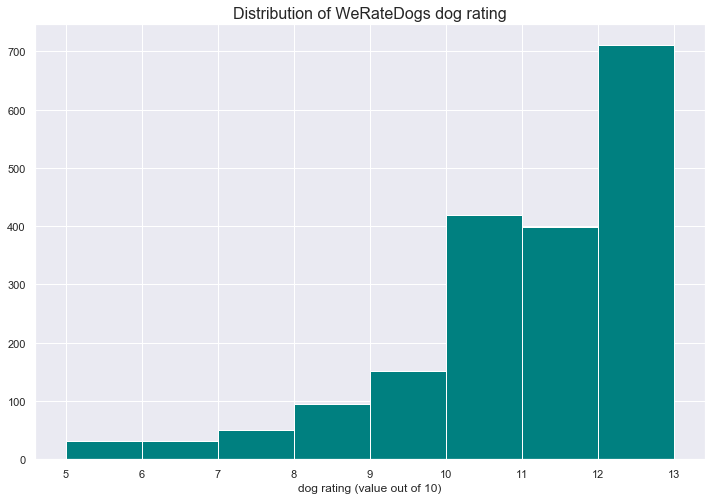

In [82]:
plt.figure(figsize=(12,8))
plt.hist(twitter_df_clean['rating_numerator'], bins=np.arange(min(twitter_df_clean['rating_numerator']), twitter_df_clean.rating_numerator.quantile(.99), 1), color="teal")
plt.title('Distribution of WeRateDogs dog rating', fontsize=16)
plt.xlabel('dog rating (value out of 10)')
plt.show()

**Insights:** Dog rating distribution is left skewed. Most of the values are between 5/10 and 13/10, with a median (from the earlier summary) of 11/10 and a mean of 12/10.

### Exploring correlations between numerical variables

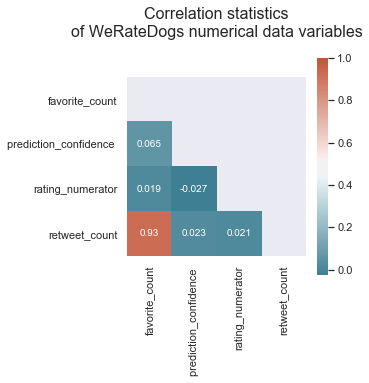

In [83]:
f, ax = plt.subplots(figsize=(4, 4))

# Remove the 'tweet_id' column, as it is stored as integer
# Remove the 'rating denominator' column, as it is always "10"
corr = twitter_df_clean[twitter_df_clean.columns.difference(['tweet_id', 'rating_denominator', 'img_num'])].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask,
            cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True),
            square=True, ax=ax,
            annot=True, annot_kws={"size": 10})


plt.title('Correlation statistics\nof WeRateDogs numerical data variables\n\n', fontsize=16)
plt.show()

Correlation coefficient interpretation:

1 (-1) - Perfect linear relationship<br>
0.70 (-0.70) - Strong linear relationship<br>
0.50 (-0.50) - Moderate relationship<br>
0.30 (-0.30) - Weak linear relationship<br>
0 - No linear relationship

**Insights:** There is a reasonable positive correlation between favorite count and retweet count. As for the dog rating numerator, we don't observe any correlation between rating and favorite / retweet count. Breed prediction confidence value also didn't show any linear relationships, which understandably means that it is not influenced by other numerical variables.

### Multivariate analysis

In [84]:
# Remove extreme outliers that will make plots uninformative:

df = twitter_df_clean.copy()
df = df[df.rating_numerator < 100]

df.rating_numerator.describe()

count    1928.000000
mean       10.751442
std         1.816124
min         5.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

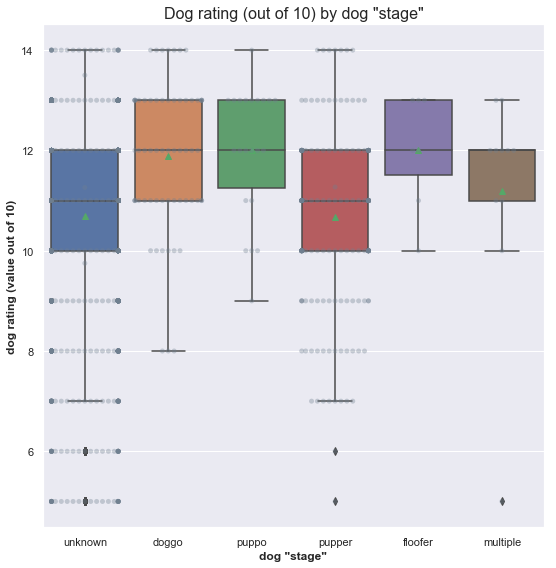

In [85]:
plt.figure(figsize=(8,8))
sns.boxplot(x="dog_stage", y="rating_numerator", data=df, showmeans=True)
sns.swarmplot(x="dog_stage", y="rating_numerator", data=df, color="slategrey", alpha=.35)

plt.tight_layout(pad=1.4)
plt.ylabel('dog rating (value out of 10)', fontweight='bold')
plt.xlabel('dog "stage"', fontweight='bold')
plt.title('Dog rating (out of 10) by dog "stage"', fontsize=16)
plt.show()

In [86]:
df.groupby('dog_stage', as_index=False)['rating_numerator'].mean()

,dog_stage,rating_numerator
0,doggo,11.888889
1,floofer,12.000000
2,multiple,11.181818
3,pupper,10.674604
4,puppo,12.000000
5,unknown,10.691627


**Insights:** Dogs in a "puppo" stage seem to receive higher ratings (mean value of 12/10) compared to other stages.

In [87]:
df.dog_stage.value_counts()

unknown     1623
pupper       202
doggo         63
puppo         22
multiple      11
floofer        7
Name: dog_stage, dtype: int64

In [88]:
df.favorite_count.describe()

count      1928.000000
mean       8879.376037
std       12933.864381
min          78.000000
25%        1940.500000
50%        4009.000000
75%       11066.500000
max      163997.000000
Name: favorite_count, dtype: float64

In [89]:
df[(df.favorite_count < 10000)].groupby('dog_stage')[['favorite_count','rating_numerator']].corr()

favorite_count  rating_numerator
dog_stage                                                   
doggo     favorite_count          1.000000          0.454590
          rating_numerator        0.454590          1.000000
floofer   favorite_count          1.000000          0.540591
          rating_numerator        0.540591          1.000000
multiple  favorite_count          1.000000          0.743844
          rating_numerator        0.743844          1.000000
pupper    favorite_count          1.000000          0.209578
          rating_numerator        0.209578          1.000000
puppo     favorite_count          1.000000          0.563671
          rating_numerator        0.563671          1.000000
unknown   favorite_count          1.000000          0.368850
          rating_numerator        0.368850          1.000000

In [90]:
df[(df.favorite_count >= 10000) & (df.favorite_count < df.favorite_count.quantile(.99))].groupby(
    'dog_stage')[['favorite_count','rating_numerator']].corr()

favorite_count  rating_numerator
dog_stage                                                   
doggo     favorite_count          1.000000          0.277990
          rating_numerator        0.277990          1.000000
floofer   favorite_count          1.000000          0.489579
          rating_numerator        0.489579          1.000000
multiple  favorite_count          1.000000          0.164544
          rating_numerator        0.164544          1.000000
pupper    favorite_count          1.000000          0.539145
          rating_numerator        0.539145          1.000000
puppo     favorite_count          1.000000          0.666338
          rating_numerator        0.666338          1.000000
unknown   favorite_count          1.000000          0.262820
          rating_numerator        0.262820          1.000000

Text(0.05,0.95,'*tweets with less than 10000 likes')

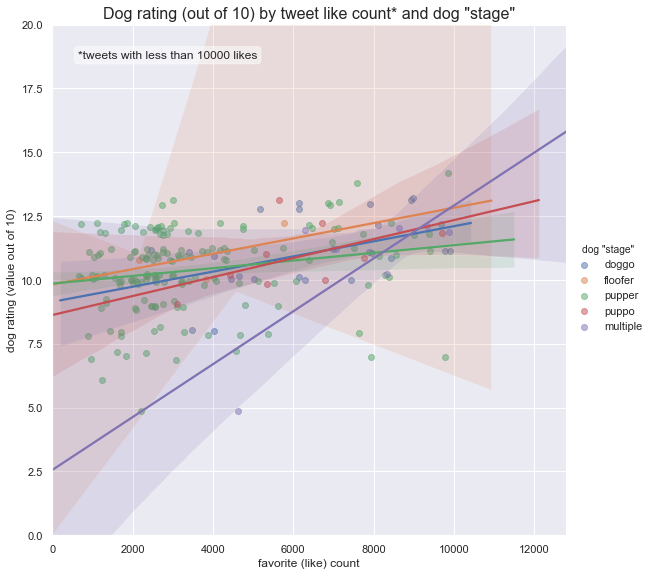

In [91]:
g = sns.lmplot(x='favorite_count',
           y='rating_numerator',
           hue='dog_stage',
               hue_order = ['doggo', 'floofer', 'pupper', 'puppo', 'multiple'],
           data=df[(df.favorite_count < 10000) &
                   (df.dog_stage != "unknown")],
           height = 8,
           fit_reg=True,
           x_jitter=0.25,
           y_jitter=0.25,
           scatter_kws={'alpha': 0.5})
g.set(xlim=(0, None))
g.set(ylim=(0, 20))

g._legend.set_title('dog "stage"')

ax = plt.gca()
ax.set_ylabel('dog rating (value out of 10)')
ax.set_xlabel('favorite (like) count')
ax.set_title('Dog rating (out of 10) by tweet like count* and dog "stage"', fontsize=16)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, '*tweets with less than 10000 likes', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

**Insights:** We observe a strong linear relationship of the like count and rating for the dogs with multiple dog stages, but we can't confirm the correlation with only 11 data points. There is a positive correlation of the like count and rating for the "puppo" and "doggo". For other dog stages, either data points are spread out or we don't have enough data to confirm any trends (for tweets with less than 10000 likes).

Text(0.05,0.95,'*tweets with more than 10000 likes')

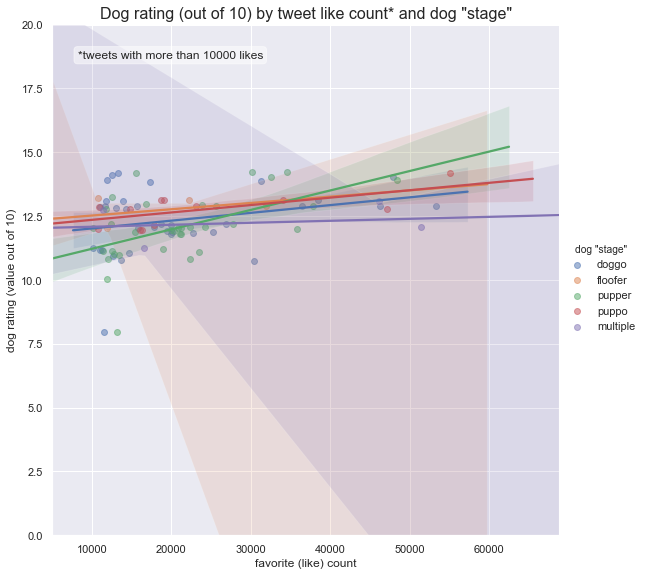

In [92]:
g = sns.lmplot(x='favorite_count',
           y='rating_numerator',
           hue='dog_stage',
               hue_order = ['doggo', 'floofer', 'pupper', 'puppo', 'multiple'],
           data=df[(df.favorite_count >= 10000) &
                   (df.favorite_count < df.favorite_count.quantile(.99)) &
                   (df.dog_stage != "unknown")],
           height = 8,
           fit_reg=True,
           x_jitter=0.25,
           y_jitter=0.25,
           scatter_kws={'alpha': 0.5})
g.set(xlim=(5000, None))
g.set(ylim=(0, 20))

g._legend.set_title('dog "stage"')

ax = plt.gca()
ax.set_ylabel('dog rating (value out of 10)')
ax.set_xlabel('favorite (like) count')
ax.set_title('Dog rating (out of 10) by tweet like count* and dog "stage"', fontsize=16)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, '*tweets with more than 10000 likes', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

**Insights:** If tweet has more than 10000 likes, it is unlikely for a dog rating to be lower than 10. There is a moderate positive correlation of the like count and rating for the "puppo" and "pupper" dogs. 

Text(0.5,0.98,'Dog rating (out of 10) by and dog "stage" and retweet count')

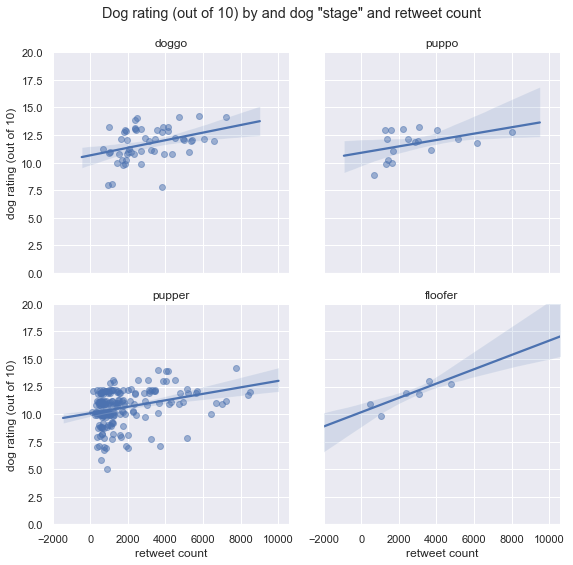

In [93]:
g = sns.lmplot(x='retweet_count',
           y='rating_numerator',
           col ='dog_stage',
           col_wrap = 2,
           data=df[(df.retweet_count < df.retweet_count.quantile(.95)) &
                   (df.dog_stage != "unknown") &
                   (df.dog_stage != "multiple")],
           height = 4,
           fit_reg=True,
           x_jitter=0.25,
           y_jitter=0.25,
           scatter_kws={'alpha': 0.5})

g = (g.set_axis_labels("retweet count", "dog rating (out of 10)"))

g.set(ylim=(0, 20))

axes = g.axes.flatten()
axes[0].set_title("doggo")
axes[1].set_title("puppo")
axes[2].set_title("pupper")
axes[3].set_title("floofer")

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Dog rating (out of 10) by and dog "stage" and retweet count')

In [94]:
df.loc[(df.dog_stage != "unknown")]['retweet_count'].corr(
    df.loc[(df.dog_stage != "unknown")]['rating_numerator'])

0.33643629750274257

**Insights:** We see a slight positive relationship of the retweet count and rating for all dog stages. We could assume a stronger correlation for the "floofer" dogs, but we would need more data points to confirm that.

Text(0.05,0.95,'*popular WeRateDogs dogs with known names')

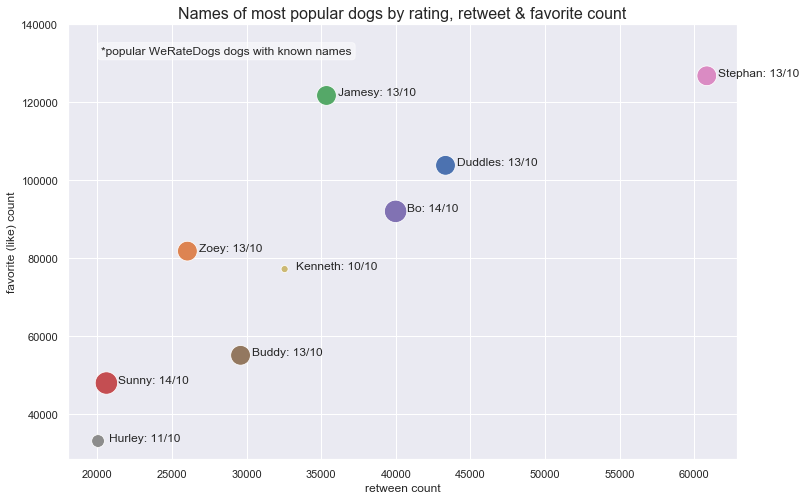

In [95]:
plot = sns.scatterplot(x='retweet_count',
                y='favorite_count',
                hue='name',
                size='rating_numerator',
                sizes=(50, 500),
                legend=False,
                data=df[(df.retweet_count > df.retweet_count.quantile(.99)) &
                   (df.name != "")])

# Add annotation to each point:
for index in df[(df.retweet_count > df.retweet_count.quantile(.99)) &
                   (df.name != "")].index:
     plot.text(df.retweet_count[index]+750, df.favorite_count[index],
             (df.name[index] + ": " + str(df.full_rating[index])),
             horizontalalignment='left', size='medium')

ax = plt.gca()
ax.set_ylabel('favorite (like) count')
ax.set_xlabel('retween count')
ax.set_title('Names of most popular dogs by rating, retweet & favorite count', fontsize=16)

ax.set_ylim(None, 140000)

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.05, 0.95, '*popular WeRateDogs dogs with known names', transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)

In [96]:
df.loc[df.name == 'Stephan'][['retweet_count', 'favorite_count']]

,retweet_count,favorite_count
397,60845,126815


**Insights:** After removing extreme outliers (e.g. Snoop Dogg), most popular dog (with a known name) is Stephan, with a rating of 13/10, 60845	retweets and 126815 likes.

Finding out top 10 predicted breeds:

In [97]:
print(dict(twitter_df_clean.predicted_breed.value_counts().nlargest(11)).keys())

dict_keys(['unknown', 'golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug', 'toy_poodle', 'chow', 'pomeranian', 'samoyed', 'malamute'])


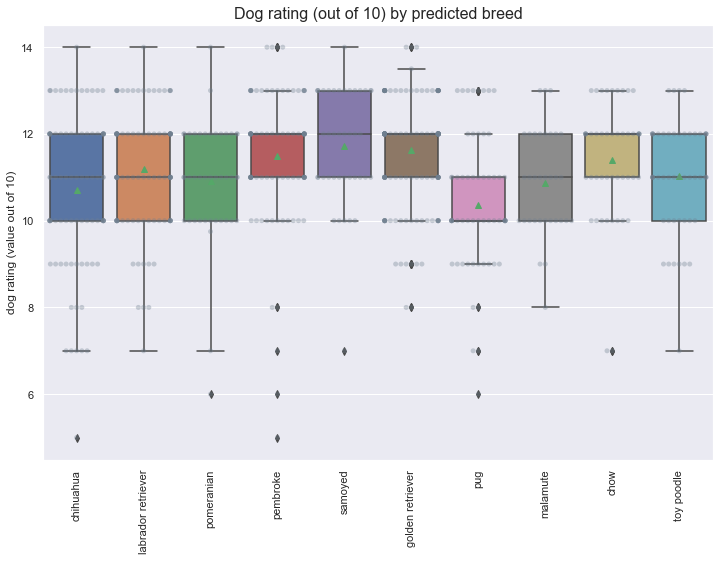

In [98]:
top_breeds = ['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua', 'pug',
              'toy_poodle', 'chow', 'pomeranian', 'samoyed', 'malamute']

plt.figure(figsize=(12,8))

data = twitter_df_clean[twitter_df_clean['predicted_breed'].isin(top_breeds)]

sns.boxplot(x="predicted_breed", y="rating_numerator", data=data, showmeans=True)
sns.swarmplot(x="predicted_breed", y="rating_numerator", data=data, color="slategrey", alpha=.35)

plt.xticks(rotation=90)

# Remove underscores from breed tick labels:
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = [l.replace('_', ' ') for l in labels]
ax.set_xticklabels(labels)

plt.ylabel('dog rating (value out of 10)')
plt.xlabel('')

plt.title('Dog rating (out of 10) by predicted breed', fontsize=16)

plt.show()

In [99]:
twitter_df_clean[twitter_df_clean['predicted_breed'].isin(top_breeds)].groupby('predicted_breed', as_index=False)['rating_numerator'].mean()

,predicted_breed,rating_numerator
0,chihuahua,10.707865
1,chow,11.404255
2,golden_retriever,11.622581
3,labrador_retriever,11.200000
4,malamute,10.878788
5,pembroke,11.489362
6,pomeranian,10.922619
7,pug,10.360656
8,samoyed,11.731707
9,toy_poodle,11.039216


**Insights:** Out of 10 most popular breeds in our dataset, pugs seem to receive lower ratings (mean value of 10.36/10) and samoyed higher ratings (mean value of 11.73/10).

In [100]:
df.timestamp.describe()

count                    1928
unique                   1928
top       2016-08-04 22:52:29
freq                        1
first     2015-11-15 22:32:08
last      2017-08-01 16:23:56
Name: timestamp, dtype: object

There are different 2051 timestamp values in our dataframe. Plotting all of them will make a lot of noise.

**Resampling timestamp data by week to make a smoother line plot:**

In [101]:
copy = df[['timestamp','rating_numerator']].copy()
copy.set_index('timestamp', inplace=True)

resampled_df = pd.DataFrame()
resampled_df['rating'] = copy.rating_numerator.resample('W').mean()

resampled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2015-11-15 to 2017-08-06
Freq: W-SUN
Data columns (total 1 columns):
rating    91 non-null float64
dtypes: float64(1)
memory usage: 1.4 KB


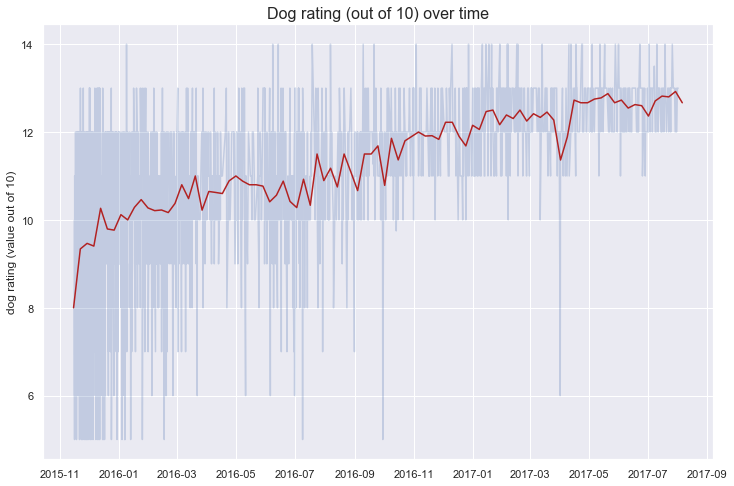

In [102]:
plt.figure(figsize=(12,8))
plt.plot(copy, alpha = .25)
plt.plot(resampled_df, color = "firebrick")

plt.ylabel('dog rating (value out of 10)')
plt.title('Dog rating (out of 10) over time', fontsize=16)
plt.show()

**Insights:** Dog ratings are becoming higher over time (for tweets between November 2015 and August 2017).

### Reflection

- Dog rating distribution is left skewed. Most of the values are between 5/10 and 13/10, with a median of 11/10 and a mean of 12/10.
- Dogs in a "puppo" stage seem to receive higher ratings (mean value of 12/10) compared to other stages.
- We observe a strong linear relationship of the like count and rating for the dogs with multiple dog stages, but we can't confirm the correlation with only 11 data points. There is a positive correlation of the like count and rating for the "puppo" and "doggo". For other dog stages, either data points are spread out or we don't have enough data to confirm any trends (for tweets with less than 10000 likes).
- If tweet has more than 10000 likes, it is unlikely for a dog rating to be lower than 10. There is a moderate positive correlation of the like count and rating for the "puppo" and "pupper" dogs. 
- We see a slight positive relationship of the retweet count and rating for all dog stages. We could assume a stronger correlation for the "floofer" dogs, but we would need more data points to confirm that.
- After removing extreme outliers (e.g. Snoop Dogg), most popular dog (with a known name) is Stephan, with a rating of 13/10, 60845	retweets and 126815 likes.
- Out of 10 most popular breeds in our dataset, pugs seem to receive lower ratings (mean value of 10.36/10) and samoyed higher ratings (mean value of 11.73/10).
- Dog ratings are becoming higher over time (for tweets between November 2015 and August 2017).




---

#### References

[1] Udacity. (November, 2018). WeRateDogs Twitter archive for Data Analyst Nanodegree program.<br>
[2] Udacity. (November, 2018). Image predictions file for Data Analyst Nanodegree program.<br>
[3] WeRateDogs™. (August 1, 2017). WeRateDogs™ Twitter account. [online] Available at: https://twitter.com/dog_rates [Accessed Feb. 2019].

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.

Copyright © 2019 https://git.io/fNK2I ALL RIGHTS RESERVED